# Background


Stars are opaque, non-reflective objects, so their spectra can be approximated by a blackbody
spectrum, which is solely dependent on an object’s surface temperature and defined by Planck’s law:

$$
I(\lambda,T) = {  {2 h c^2} \over {\lambda^5}}  {  1 \over {  e^{  {hc}\over{\lambda k_B T}       }-1  } }
$$
or does this look better
$$
I(\lambda,T) = {  {2 h c^2} \over {\lambda^5}}  {  1 \over {  exp(  {{hc}\over{\lambda k_B T}}  ) -1  } }
$$

where I is the intensity (W sr$^{-1}$ m$^{-3}$ ), which is the energy emitted per second (W) at a certain
wavelength (m$^{-1}$ ) from a given amount of surface area (m$^{-2}$ ) as received by an outside object that
covers a given solid angle (sr$^{ -1}$ ). (Note: solid angle is the two-dimensional angle that an
object subtends at a point, giving the size an object appears to be.) The three physical constants are:
the speed of light in a vacuum $c$ , Planck’s constant $h$ , and the Boltzmann constant $k_B$ .
Because stars have atmospheres, Planck’s law is only an approximation of their spectra. Particles
in stars’ atmospheres create absorption lines that differentiate real stellar spectra from a pure
blackbody curve. This deviation is visible in the stellar spectra you will be using in Part 2.

### Derek's suggestion to trim down the 121 text:

In Lesson 1 you learned how to plot a blackbody spectrum [or Planck curve -- take whatever terminology Amy uses].  In this lesson, you will learn how to overlay multiple curves on the same plot, showing for example how the shape of the blackbody spectrum changes with the temperature.  As part of this exercise, we will put the formula for computing the spectrum in a function so it is separated from the main body of the code (this is good coding practice because it makes complicated programs easier to understand and debug).  Finally, you will learn how to read in data from a file and plot it as points.  For this exercise you will be provided with data for the Sun's spectrum.  By plotting the Sun's data points onto your blackbody curves, you will be able to deduce the equilibrium temperature of the Sun.

First, in order to make multiple curves on the same plot, we are going to introduce the concept of a "for" loop.  FOR LOOP DISCUSSION GOES HERE: students either take their code from Lesson 1 or write new code for plotting the bb curve, then add a loop and make a legend for plotting. [NOTE: Amy may have had the students plot on linear scale, so need to introduce plt.loglog() here -- or we could stick with linear I suppose]

Your code will look cleaner if you put the blackbody formula into its own function.  This makes the code easier to read and debug, and promotes the idea of code "reusuability" -- you could, for example, develop several useful code segments you might want to use over and over again.  Keeping these as separate functions makes it easy to use them in other programs. DEF DISCUSSION GOES HERE: students put their bb curve formula into a simple function that takes wavelength (array) and temperature (scalar) as input, and returns the radiance (array).

Finally, let us read in existing data for the Sun's spectrum and compare it to the blackbody curves we've generated.  We will use the loadtxt() function provided by numpy.  This is a versatile function for reading tabular data; today we will use it to read 2 columns of data from a text file [GIVE FILE LOCATION DETAILS]. LOADTXT DISCUSSION GOES HERE: plot the data as points so it's clear what's data vs. what's theory.

Final part of the exercise: what is the approximate effective temperature of the Sun?  Note the data departs from the ideal at short wavelength, so use the longer-wavelength data for your estimation.  ANSWER: 6,000 K (actually 5,800 or so). 

In [6]:
# modules to import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#    physical constants
h  = 6.626e-34              # Planck constant (J s)
k  = 1.381e-23              # Boltzmann constant (J/K)
c  = 299792458.0            # speed of light (m/s)
pi = np.pi                  # 3.1415...

#    astronomical constants
sun_radius   = 6.955e8      # in meters
sun_distance = 1.496e11     # 1 au in meters



In [2]:
temperature_range = np.arange(3000, 9000, 1000)     # 3,000 K to 8,000 K
wavelength_range  = np.logspace(-7.0, -3.0, 1000)   # 100 nm to 1 mm


In [3]:
def planck(wavelength, temperature):
    return 2.0 * pi * h * c**2 / (wavelength**5 * (np.exp(h * c / (wavelength * k * temperature)) - 1.0))

def plancks(w,T):
    """ shorter notation version of the Planck curve"""
    return 2*pi*h*c**2 / (w**5*(np.exp(h*c/(w*k*T)) - 1))


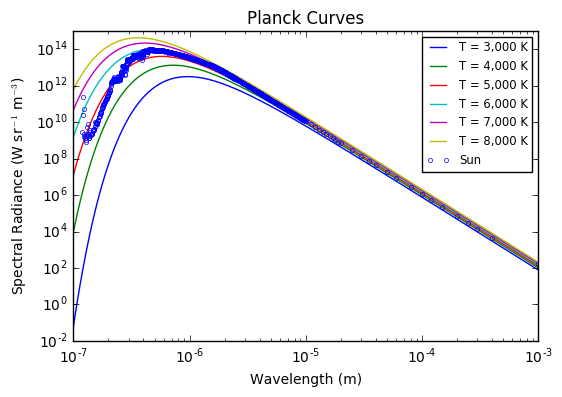

In [8]:
for temperature in temperature_range:
    plt.loglog(wavelength_range, planck(wavelength_range, temperature), label='T = {:,} K'.format(temperature))
   
sun_wave, sun_temp = np.loadtxt('../data/ASTM_E-490.dat',unpack=True)
plt.loglog(sun_wave * 1.0e-6, sun_temp * 1.0e6 * (sun_distance / sun_radius)**2, 'b.', fillstyle='none', label='Sun')
plt.xlabel('Wavelength (m)')
plt.ylabel('Spectral Radiance (W sr$^{-1}$ m$^{-3}$)')
plt.legend(loc='upper right',fontsize='small')
plt.title('Planck Curves')
plt.show()